In [1]:
cd ~/

/mnt/homes/home024/nwilming


In [12]:
import pandas as pd
%matplotlib inline

In [3]:
from conf_analysis.behavior import individual_sample_model as ism

/home/nwilming/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
import cPickle
import glob

files = glob.glob('/home/nwilming/conf_analysis/intermediates/*modeltrace.pickle')

In [5]:
dfs = []
for f in files:
    snum = int(f.split('/')[-1].split('_')[0].replace('s', ''))
    var  = (f.split('/')[-1].split('_')[1].replace('var', ''))=='True'
    k = cPickle.load(open(f))
    index = pd.MultiIndex.from_tuples([(snum, var)], names=['snum', 'var'])
    df = pd.DataFrame(dict((n, k[n]) for n in ['waic_se', 'bpic', 'waic', 'p_waic', 'dic']), index=index)
    dfs.append(df)
df = pd.concat(dfs)

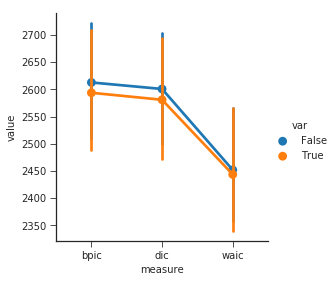

In [6]:
import seaborn as sns
k = df.loc[:, ('bpic', 'dic', 'waic')].stack().reset_index()
k.columns = ['snum', 'var', 'measure', 'value']
sns.factorplot(x='measure', y='value', hue='var', data=k)

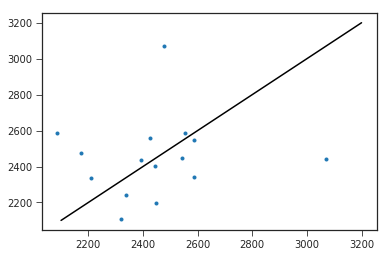

In [16]:

plt.plot(df.query('var==True').waic, df.query('var==False').waic, '.')
plt.plot([2100, 3200], [2100, 3200], 'k-')